# Name : Varad Vikas Patil
# Roll No. : 22B2270

In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# TASK 1

# Data augmentation and rescaling

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)

train_generator = train_datagen.flow_from_directory(
    'pizza_not_pizza',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='training')

validation_generator = train_datagen.flow_from_directory(
    'pizza_not_pizza',
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary',
    subset='validation')


Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


# Define the model

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


# Training the Model

In [ ]:
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)


Epoch 1/20
79/79 [==============================] - 42s 526ms/step - loss: 0.6354 - accuracy: 0.6372 - val_loss: 0.5302 - val_accuracy: 0.7628
Epoch 2/20
79/79 [==============================] - 35s 448ms/step - loss: 0.6105 - accuracy: 0.6804
Epoch 3/20
79/79 [==============================] - 36s 458ms/step - loss: 0.5688 - accuracy: 0.7230
Epoch 4/20
79/79 [==============================] - 38s 482ms/step - loss: 0.5489 - accuracy: 0.7217
Epoch 5/20
79/79 [==============================] - 36s 448ms/step - loss: 0.5521 - accuracy: 0.7147
Epoch 6/20
79/79 [==============================] - 37s 462ms/step - loss: 0.5402 - accuracy: 0.7274
Epoch 7/20
79/79 [==============================] - 40s 511ms/step - loss: 0.5232 - accuracy: 0.7471
Epoch 8/20
79/79 [==============================] - 33s 421ms/step - loss: 0.4826 - accuracy: 0.7840
Epoch 9/20
79/79 [==============================] - 35s 435ms/step - loss: 0.5089 - accuracy: 0.7490
Epoch 10/20
79/79 [==============================

# Testing the Model

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, steps=20)
print(f"Test Accuracy: {test_acc}")

20/20 [==============================] - 3s 133ms/step - loss: 0.3984 - accuracy: 0.8189
Test Accuracy: 0.8188775777816772


# Visualization

1/1 [==============================] - 0s 180ms/step


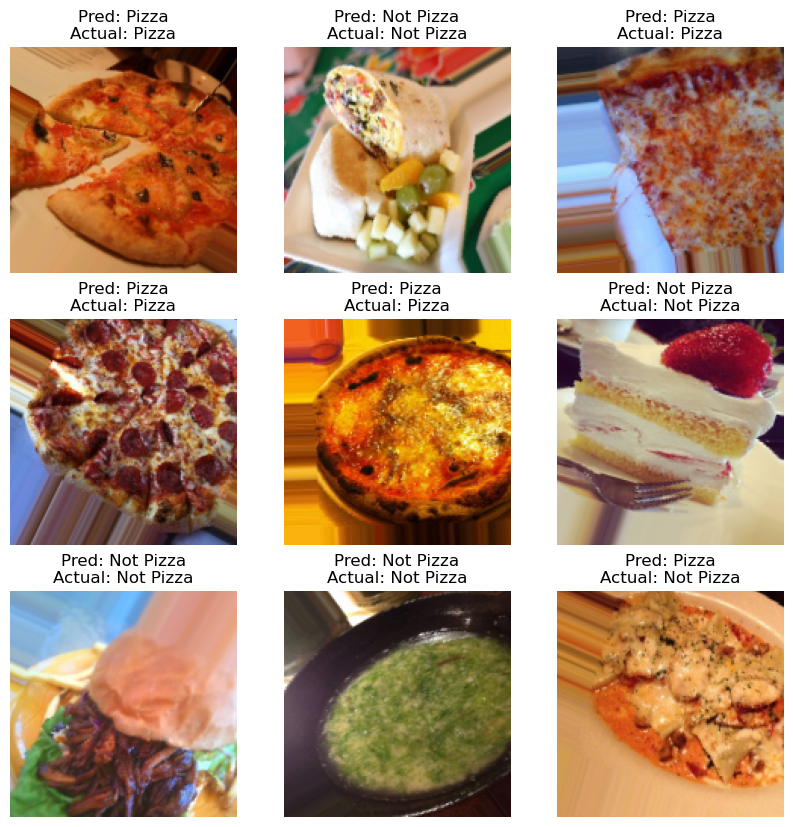

In [ ]:
# Get a batch of images
images, labels = next(validation_generator)
predictions = model.predict(images)

# Plot the images with predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(images[i])
    plt.title(f"Pred: {'Pizza' if predictions[i] > 0.5 else 'Not Pizza'}\nActual: {'Pizza' if labels[i] > 0.5 else 'Not Pizza'}")
    plt.axis('off')
plt.show()

In [4]:
# Check if GPU is available
if tf.test.gpu_device_name():
    print(f"Default GPU Device: {tf.test.gpu_device_name()}")
else:
    print("Please install GPU version of TensorFlow")

Default GPU Device: /device:GPU:0


In [5]:
# Load the VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model
for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 4s 0us/step


In [6]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

170498071/170498071 [==============================] - 18s 0us/step


In [8]:
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=16)  # Reduced batch size

Epoch 1/10
2500/2500 [==============================] - 26s 9ms/step - loss: 1.3406 - accuracy: 0.5255 - val_loss: 1.2218 - val_accuracy: 0.5750
Epoch 2/10
2500/2500 [==============================] - 23s 9ms/step - loss: 1.1613 - accuracy: 0.5883 - val_loss: 1.1959 - val_accuracy: 0.5802
Epoch 3/10
2500/2500 [==============================] - 20s 8ms/step - loss: 1.0801 - accuracy: 0.6188 - val_loss: 1.1543 - val_accuracy: 0.5945
Epoch 4/10
2500/2500 [==============================] - 21s 8ms/step - loss: 1.0160 - accuracy: 0.6409 - val_loss: 1.1299 - val_accuracy: 0.6112
Epoch 5/10
2500/2500 [==============================] - 21s 8ms/step - loss: 0.9551 - accuracy: 0.6608 - val_loss: 1.1376 - val_accuracy: 0.6135
Epoch 6/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.9042 - accuracy: 0.6791 - val_loss: 1.1495 - val_accuracy: 0.6149
Epoch 7/10
2500/2500 [==============================] - 19s 8ms/step - loss: 0.8491 - accuracy: 0.6985 - val_loss: 1.1578 - val_ac

In [9]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc}")

313/313 [==============================] - 3s 8ms/step - loss: 1.2269 - accuracy: 0.6187
Test Accuracy: 0.6187000274658203


In [10]:
predictions = model.predict(x_test)

313/313 [==============================] - 2s 7ms/step


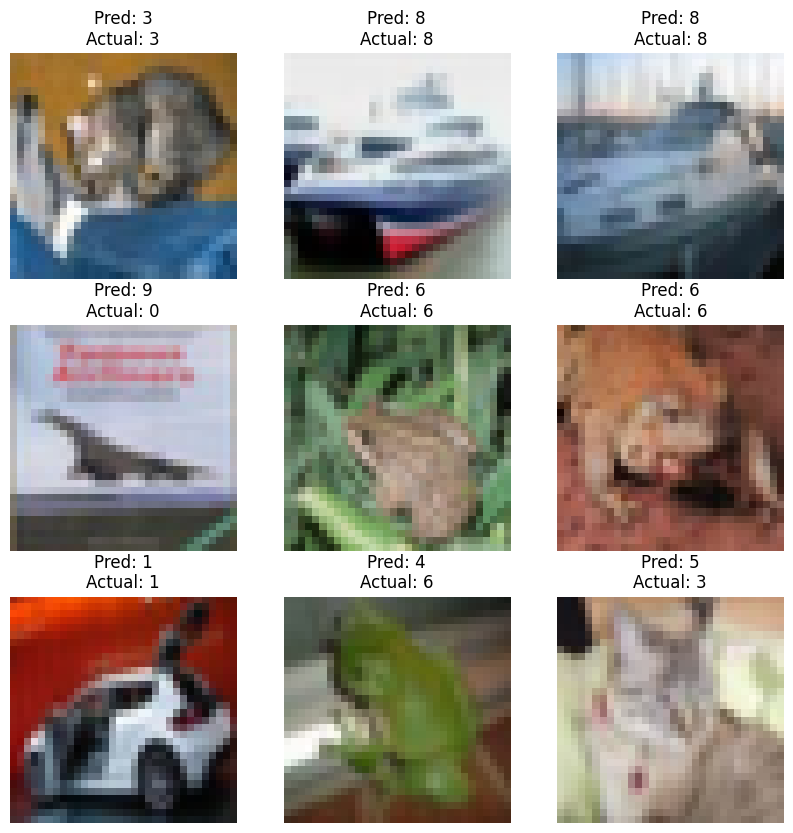

In [11]:
# Plot the images with predicted and actual labels
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {np.argmax(predictions[i])}\nActual: {y_test[i][0]}")
    plt.axis('off')
plt.show()